In [1]:
suppressMessages(suppressWarnings(source("../config/config_sing.R")))
show_env()

You are in Singularity: singularity_proj_encode_fcc 
BASE DIRECTORY (FD_BASE): /data/reddylab/Kuei 
WORK DIRECTORY (FD_WORK): /data/reddylab/Kuei/out 
CODE DIRECTORY (FD_CODE): /data/reddylab/Kuei/code 
PATH OF PROJECT (FD_PRJ): /data/reddylab/Kuei/code/Proj_CombEffect_ENCODE_FCC 
PATH OF RESULTS (FD_RES): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc 
PATH OF LOG     (FD_LOG): /data/reddylab/Kuei/out/proj_combeffect_encode_fcc/log 


In [5]:
fdiry = file.path(FD_RES, "results", "CRISPRi_Growth_K562_Gersbach", "coverage")
dir(fdiry)

[1] "CRISPRi_rAVG_log2FC_2.bed" "CRISPRi_rAVG_log2FC_2.wig"

In [6]:
fdiry = file.path(FD_RES, "results", "CRISPRi_Growth_K562_Gersbach", "coverage")
fname = "CRISPRi_rAVG_log2FC_2.bed"
fpath = file.path(fdiry, fname)

txt = paste("head", fpath)
system(txt, intern=TRUE)

[1] "chr1\t605580\t605581\tid-1\t-0.180660" 
 [2] "chr1\t605581\t605582\tid-2\t0.486646"  
 [3] "chr1\t605589\t605590\tid-3\t3.171240"  
 [4] "chr1\t605591\t605592\tid-4\t-0.364573" 
 [5] "chr1\t605592\t605593\tid-5\t-0.206319" 
 [6] "chr1\t605609\t605610\tid-6\t-0.266750" 
 [7] "chr1\t605617\t605618\tid-7\t-0.774100" 
 [8] "chr1\t605618\t605619\tid-8\t-0.353224" 
 [9] "chr1\t605619\t605620\tid-9\t-0.187707" 
[10] "chr1\t605620\t605621\tid-10\t-0.420401"

In [8]:
fdiry = file.path(FD_RES, "results", "CRISPRi_Growth_K562_Gersbach", "coverage")
fname = "CRISPRi_rAVG_log2FC_2.bed"
fpath = file.path(fdiry, fname)

cnames = c("Chrom", "Start", "End", "Name", "Score")
dat = read_tsv(fpath, col_names = cnames)

### assign and show
dat_guides_crispri_growth = dat
print(dim(dat))
head(dat)

Rows: 1083147 Columns: 5
── Column specification ─────────────────────────────────────────────────────────────────────
Delimiter: "\t"
chr (2): Chrom, Name
dbl (3): Start, End, Score

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] 1083147       5


Chrom,Start,End,Name,Score
<chr>,<dbl>,<dbl>,<chr>,<dbl>
chr1,605580,605581,id-1,-0.180660
chr1,605581,605582,id-2,0.486646
chr1,605589,605590,id-3,3.171240
chr1,605591,605592,id-4,-0.364573
chr1,605592,605593,id-5,-0.206319
chr1,605609,605610,id-6,-0.266750


In [11]:
summary(dat$Score)

     Min.   1st Qu.    Median      Mean   3rd Qu.      Max. 
-8.901310 -0.328361 -0.025019  0.000325  0.287618 16.367500 

[1] 1083147       5
[1] 1077211       5


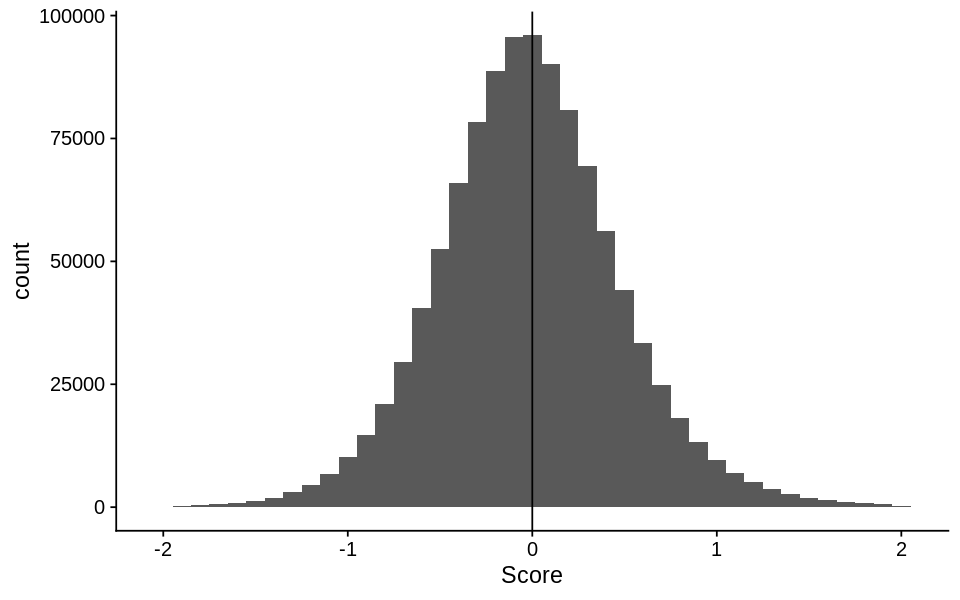

In [20]:
dat = dat_guides_crispri_growth
print(dim(dat))
dat = dat %>% dplyr::filter(abs(Score) < 2)
print(dim(dat))

gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(binwidth = 0.1) +
    geom_vline(xintercept = c(0)) +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)

In [22]:
dat = dat_guides_crispri_growth
vec = dat$Score
print(mean(vec))
print(sd(vec))

[1] 0.0003245292
[1] 0.5713106


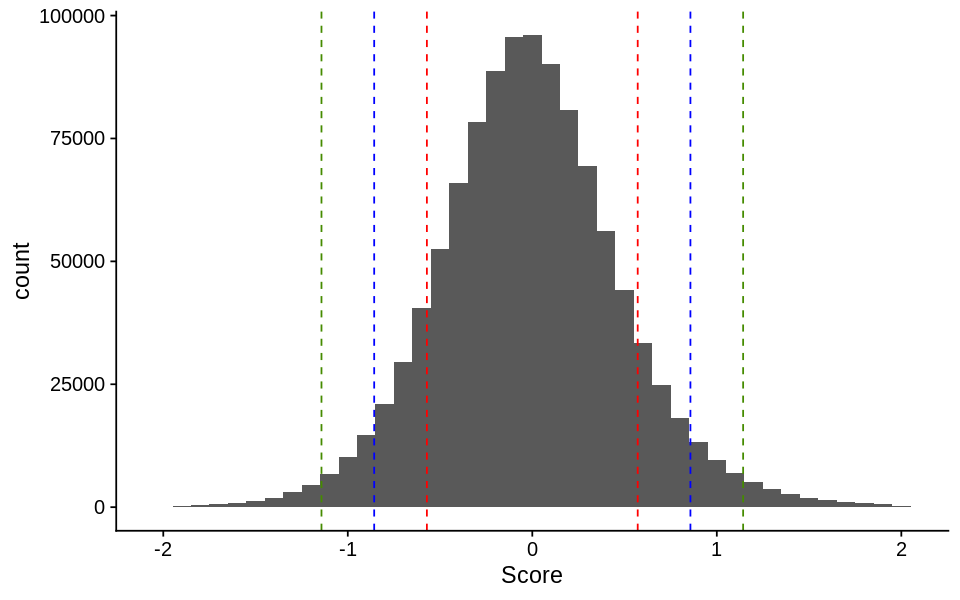

In [31]:
### init
dat = dat_guides_crispri_growth
vec = dat$Score

### stats
val_mu = mean(vec)
val_sd = sd(vec)
vec_sd = c(val_sd, -val_sd)

### visualize
dat = dat %>% dplyr::filter(abs(Score) < 2)
gpt = ggplot(dat, aes(x=Score)) + 
    geom_histogram(binwidth = 0.1) +
    geom_vline(xintercept = vec_sd * 1.0, linetype="dashed", color="red") +
    geom_vline(xintercept = vec_sd * 1.5, linetype="dashed", color="blue") +
    geom_vline(xintercept = vec_sd * 2.0, linetype="dashed", color="chartreuse4") +
    theme_cowplot()

options(repr.plot.height=5, repr.plot.width=8)
print(gpt)